In [16]:
import openpyxl
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [43]:
data = pd.read_excel('KhipuData.xlsx')
famVals = pd.read_excel('FamilyGrouped.xlsx')
famData = pd.read_excel('KhipuFamilies.xlsx')

Building the database

In [3]:
#to format a row and ensure numbers are not stored as strings - will be helpful down the line when analyzing data

def deal_with_rows(row):
    value = row.split(':')[-1]
    try:
        value = float(value)
        return value
    except:
        return value

In [ ]:
#Using pandas to create Excel sheets
all_fnames = glob.glob('ExcelNotebooks/*.xlsx')

list_data = []

for fname in all_fnames:
    #Was having issues with hidden files, this bypasses them
    if '~' in fname:
        continue

    #truncates the file name to just discard the '.xlsx'
    khipuName = fname.split('/')[-1].split('.')[0]

    # load dataframe from this filename, and apepnd to list_data - secondary and pendant cords
    final_df = pd.read_excel(fname, sheet_name=4, engine="openpyxl")

    #creates a cord leveling system, so we can more easily see how each level of cord compares
    final_df['Cord_Name'] = [sum(1 for char in cord_name if char.isalpha()) for cord_name in final_df.Cord_Name]

    # Add Khipu Name to final_df
    final_df['khipuName'] = khipuName
    final_df = final_df[['khipuName', 'Cord_Name', 'Twist', 'Attachment', 'Knots', 'Length', 'Termination', 'Thickness',
        'Color', 'Value', 'Alt_Value', 'Position', 'Notes']]


    #Copies primary cord info

    primary = pd.read_excel(fname, sheet_name=2, engine="openpyxl")
    
    row = [deal_with_rows(row) for row in primary['!-- Primary Cord Data']]

    twist = row[7]
    length = row[2]
    termination = row[6]
    thickness = row[1]
    color = row[3]
    notes = row[8]

    row = [khipuName, 0, twist, None, None, length, termination, thickness, color, None, None, None, notes]
    final_df.loc[len(final_df.index)] = row

    list_data.append(final_df)

data = pd.concat(list_data)
#display(data)

C:\Users\Sahil Jain\AppData\Local\Temp\ipykernel_8600\458446387.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df.loc[len(final_df.index)] = row


In [5]:
#display(data)
data.to_excel('KhipuData.xlsx')

In [6]:
data.Cord_Name

0      1
1      2
2      1
3      2
4      1
      ..
281    1
282    1
283    1
284    1
285    0
Name: Cord_Name, Length: 61941, dtype: int64

Length stats

In [5]:
#General mean
filtered_data = data[(data['Cord_Name'] != 0) & (data['Length'] != 0) & data['Length'].notna()]
display(filtered_data['Length'].mean())

np.float64(31.956461010134852)

In [6]:
def lengthStats(group):
    group = group[(group.Length.notna()) & (group.Length != 0)]
    meanLength = group.Length.mean()
    stdLength = group.Length.std()
    return (meanLength, stdLength)

def lengthStatsNoTermination(group):
    group = group[(group.Length.notna()) & (group.Length != 0) & (group.Termination != 'B')]
    meanLength = group.Length.mean()
    stdLength = group.Length.std()
    return (meanLength, stdLength)

def lengthStatsTerminationOnly(group):
    group = group[(group.Length.notna()) & (group.Length != 0) & (group.Termination == 'B')]
    meanLength = group.Length.mean()
    stdLength = group.Length.std()
    return (meanLength, stdLength)

dataFiltered = data.groupby(['Cord_Name']).apply(lengthStats).apply(pd.Series).reset_index()
dataFiltered = dataFiltered.rename(columns = {0: 'Mean Length', 1: 'STD Length'})
print("Length Stats - general")
display(dataFiltered)


dataNoTermination = data.groupby(['Cord_Name']).apply(lengthStatsNoTermination).apply(pd.Series).reset_index()
dataNoTermination = dataNoTermination.rename(columns = {0: 'Mean Length', 1: 'STD Length'})
print("Length stats - No Broken termination")
display(dataNoTermination)

dataTermination = data.groupby(['Cord_Name']).apply(lengthStatsTerminationOnly).apply(pd.Series).reset_index()
dataTermination = dataTermination.rename(columns = {0: 'Mean Length', 1: 'STD Length'})
print("Length stats - Broken Termination Only")
display(dataTermination)

Length Stats - general


C:\Users\Sahil Jain\AppData\Local\Temp\ipykernel_31664\563624489.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dataFiltered = data.groupby(['Cord_Name']).apply(lengthStats).apply(pd.Series).reset_index()


,Cord_Name,Mean Length,STD Length
0,0,58.902562,47.984463
1,1,34.404793,14.944148
2,2,25.650639,13.204950
3,3,25.856694,13.136783
4,4,28.127536,11.592511
5,5,26.957447,9.841588
6,6,25.285714,13.912995


Length stats - No Broken termination


C:\Users\Sahil Jain\AppData\Local\Temp\ipykernel_31664\563624489.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dataNoTermination = data.groupby(['Cord_Name']).apply(lengthStatsNoTermination).apply(pd.Series).reset_index()


,Cord_Name,Mean Length,STD Length
0,0,62.731738,46.013593
1,1,37.671676,12.831750
2,2,27.817944,12.298969
3,3,27.484627,12.530080
4,4,29.232919,10.764982
5,5,27.722222,9.294155
6,6,25.285714,13.912995


Length stats - Broken Termination Only


C:\Users\Sahil Jain\AppData\Local\Temp\ipykernel_31664\563624489.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dataTermination = data.groupby(['Cord_Name']).apply(lengthStatsTerminationOnly).apply(pd.Series).reset_index()


,Cord_Name,Mean Length,STD Length
0,0,44.050000,52.565604
1,1,18.324558,14.179022
2,2,11.910251,10.115414
3,3,12.062105,9.601279
4,4,12.652174,11.924416
5,5,9.750000,6.010408
6,6,NaN,NaN


As expected, broken cords are much shorter than unbroken cords. 

<Axes: xlabel='Cord_Name', ylabel='Length'>

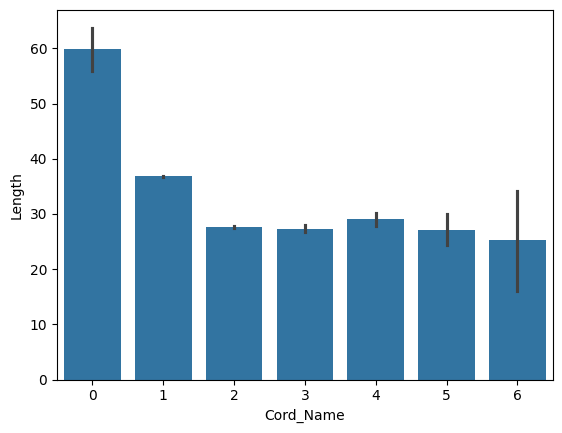

In [ ]:
sns.barplot(
    data = data[data.Termination != 'B'],
    x = 'Cord_Name', 
    y = 'Length', 
)

<Axes: xlabel='Cord_Name', ylabel='Length'>

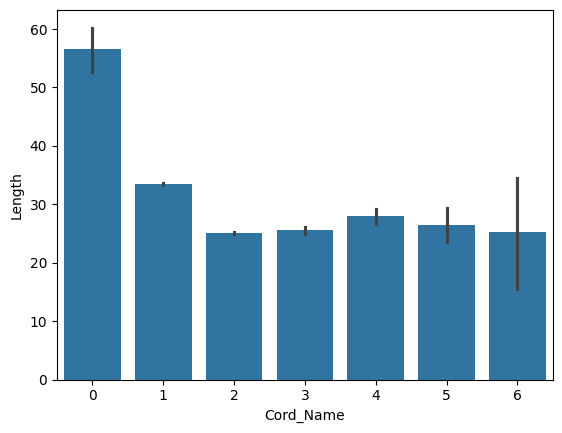

In [8]:
sns.barplot(
    data = data,
    x = 'Cord_Name', 
    y = 'Length'
)


<Axes: xlabel='Cord_Name', ylabel='Length'>

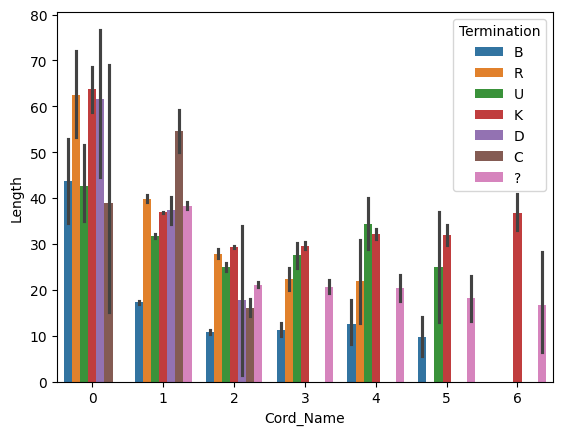

In [9]:
sns.barplot(
    data = data,
    x = 'Cord_Name', 
    y = 'Length',
    hue = 'Termination'
)

Not ending specifics: 
Pendant, subsidiaries 1 and 2 small STD, --> Standardization of primary and pendant, first 2 levels of subsidiary? This would make sense because those 4 levels would be used the most, likely would not have much of 
subsidiary 6 large STD, 

Ending Specific:
Knotted endings generally long,
Doubled has big Standard Deviation + 95% CI - variability
broken cords smaller than other cords

Knot Attachment vs Value

In [10]:
def ValStats(group):
    group = group[(group.Value.notna()) & (group.Value != 0)]
    meanLength = group.Value.mean()
    stdLength = group.Value.std()
    return (meanLength, stdLength)

def ValStats2(group):
    group = group[(group.Value.notna())]
    meanLength = group.Value.mean()
    stdLength = group.Value.std()
    return (meanLength, stdLength)



dataFiltered = data.groupby(['Attachment']).apply(ValStats).apply(pd.Series).reset_index()
dataFiltered = dataFiltered.rename(columns = {0: 'Mean Value', 1: 'STD Value'})
print("Val stats - excluding 0 value cords")
display(dataFiltered)

dataFiltered = data.groupby(['Attachment']).apply(ValStats2).apply(pd.Series).reset_index()
dataFiltered = dataFiltered.rename(columns = {0: 'Mean Value', 1: 'STD Value'})
print("Val stats - including 0 value cords")
display(dataFiltered)

Val stats - excluding 0 value cords


C:\Users\Sahil Jain\AppData\Local\Temp\ipykernel_31664\1670789680.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dataFiltered = data.groupby(['Attachment']).apply(ValStats).apply(pd.Series).reset_index()


,Attachment,Mean Value,STD Value
0,R,378.928946,4315.738051
1,T,233.109453,753.635010
2,U,126.689201,1291.599253
3,Unknown,151.402287,1186.044019
4,V,212.522848,1644.002811


Val stats - including 0 value cords


C:\Users\Sahil Jain\AppData\Local\Temp\ipykernel_31664\1670789680.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dataFiltered = data.groupby(['Attachment']).apply(ValStats2).apply(pd.Series).reset_index()


,Attachment,Mean Value,STD Value
0,R,270.929978,3653.223755
1,T,167.339286,646.675554
2,U,89.008212,1084.151590
3,Unknown,93.125959,932.915198
4,V,143.961231,1356.700039


Attachment Vs Length

In [11]:
def lengthStats(group):
    group = group[(group.Length.notna()) & (group.Length != 0)]
    meanLength = group.Length.mean()
    stdLength = group.Length.std()
    return (meanLength, stdLength)

dataFiltered = data.groupby(['Attachment']).apply(lengthStats).apply(pd.Series).reset_index()
dataFiltered = dataFiltered.rename(columns = {0: 'Mean Length', 1: 'STD Length'})
print("Length stats")
display(dataFiltered)

Length stats


C:\Users\Sahil Jain\AppData\Local\Temp\ipykernel_31664\2076524206.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dataFiltered = data.groupby(['Attachment']).apply(lengthStats).apply(pd.Series).reset_index()


,Attachment,Mean Length,STD Length
0,R,32.783486,14.222159
1,T,25.433519,18.086834
2,U,31.605084,16.202271
3,Unknown,26.978135,13.807621
4,V,32.129606,13.616715


End Knot vs Cord Level

<Axes: xlabel='Termination', ylabel='Cord_Name'>

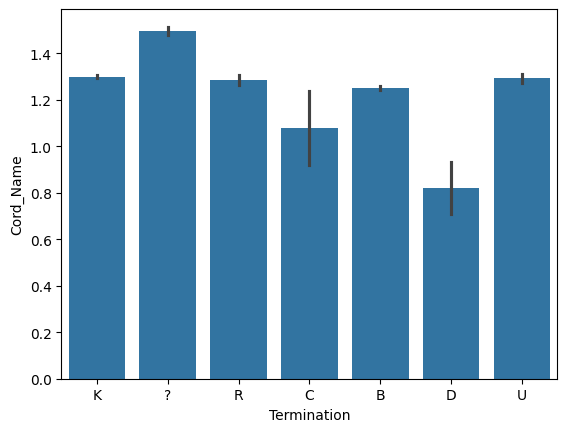

In [ ]:
#If creating this graph doesn't work, use the read_excel cell above, and then try again. 

sns.barplot(
    data = data,
    x = 'Termination',
    y = 'Cord_Name',
)

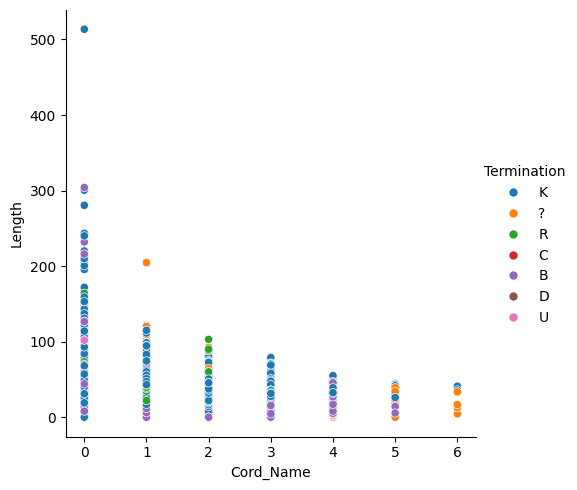

In [ ]:
sns.relplot(
    data = data,
     x = 'Cord_Name',
     y = 'Length',
     hue = 'Termination'
    )

ZERO Value Knot Distribution - Comparing This and Value Knots distributions, we see that value knots are generally larger than nonvalue knots.

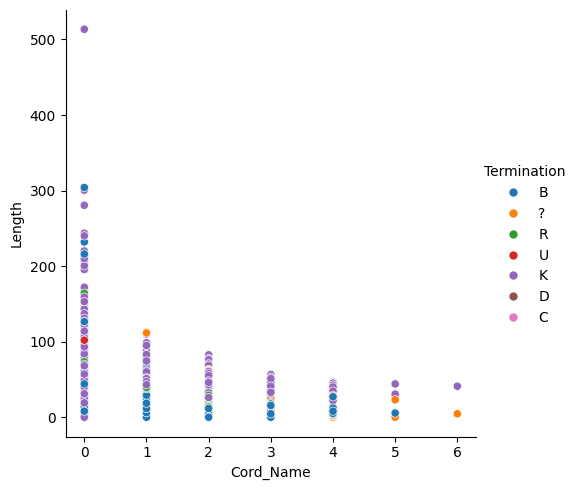

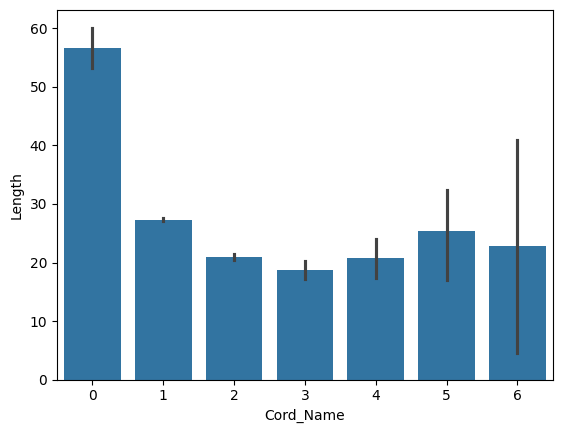

Length stats


C:\Users\Sahil Jain\AppData\Local\Temp\ipykernel_8688\1178238048.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dataFiltered = value_filter.groupby(['Cord_Name']).apply(lengthStats).apply(pd.Series).reset_index()


,Cord_Name,Mean Length,STD Length
0,0,56.616791,48.400728
1,1,27.327673,17.918249
2,2,20.947307,16.315893
3,3,18.706767,16.277552
4,4,20.750000,15.842169
5,5,25.300000,13.034569
6,6,22.750000,25.809398


In [ ]:
#filter data for value = 0, (primary cords included)

value_filter = data[((data['Value'] == 0) | (data['Cord_Name'] == 0)) & data['Length'].notna()]
sns.relplot(
    data = value_filter,
    x = 'Cord_Name',
    y = 'Length',
    hue = 'Termination'
)
plt.show()

sns.barplot(
    data = value_filter,
    x = 'Cord_Name',
    y = 'Length'
)
plt.show()

def lengthStats(group):
    meanLength = group.Length.mean()
    stdLength = group.Length.std()
    return (meanLength, stdLength)

dataFiltered = value_filter.groupby(['Cord_Name']).apply(lengthStats).apply(pd.Series).reset_index()
dataFiltered = dataFiltered.rename(columns = {0: 'Mean Length', 1: 'STD Length'})
print("Length stats")
display(dataFiltered)

NUMERICAL VALUE knot distribution

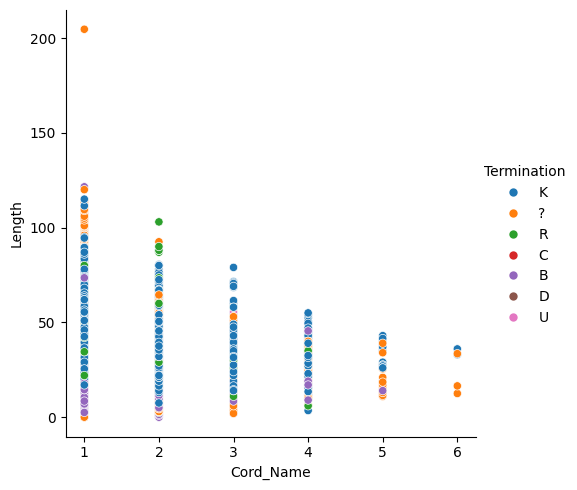

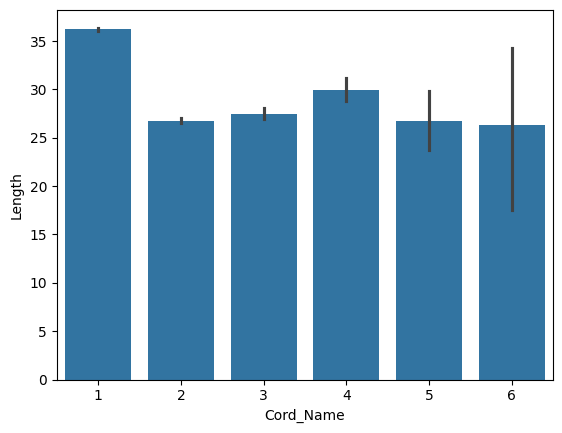

Length stats


C:\Users\Sahil Jain\AppData\Local\Temp\ipykernel_31664\2828414436.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dataFiltered = numerical_value_filter.groupby(['Cord_Name']).apply(lengthStats).apply(pd.Series).reset_index()


,Cord_Name,Mean Length,STD Length
0,1,36.230985,13.848780
1,2,26.780766,11.910492
2,3,27.500387,11.692774
3,4,29.921245,9.506974
4,5,26.684211,9.895004
5,6,26.300000,10.923598


In [16]:
#filter data for value != 0

numerical_value_filter = data[data['Value'] > 0 & data['Length'].notna()]
sns.relplot(
    data = numerical_value_filter,
    x = 'Cord_Name',
    y = 'Length',
    hue = 'Termination'
)
plt.show()

sns.barplot(
    data = numerical_value_filter,
    x = 'Cord_Name',
    y = 'Length'
)
plt.show()

def lengthStats(group):
    meanLength = group.Length.mean()
    stdLength = group.Length.std()
    return (meanLength, stdLength)

dataFiltered = numerical_value_filter.groupby(['Cord_Name']).apply(lengthStats).apply(pd.Series).reset_index()
dataFiltered = dataFiltered.rename(columns = {0: 'Mean Length', 1: 'STD Length'})
print("Length stats")
display(dataFiltered)

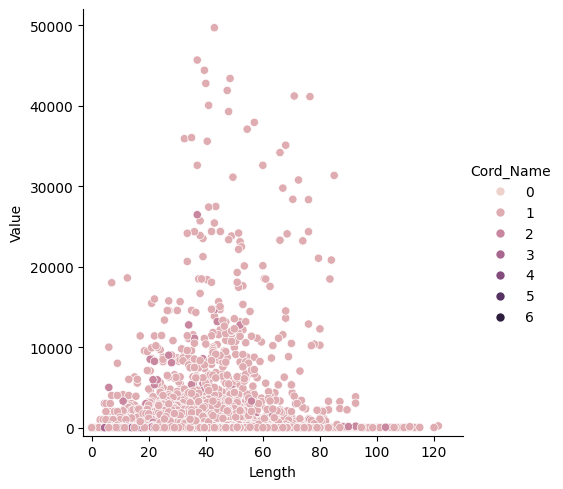

In [33]:
sns.relplot(
    data = data,
    x = 'Length',
    y = 'Value',
    hue = 'Cord_Name'
)
plt.xlim(-3, 130)
plt.ylim(-1000, 52000)
#There's 8 outlier points being cut off here
plt.show()

Value Vs Termination - Av. Value of Cut Cord Termination is MUCH Higher

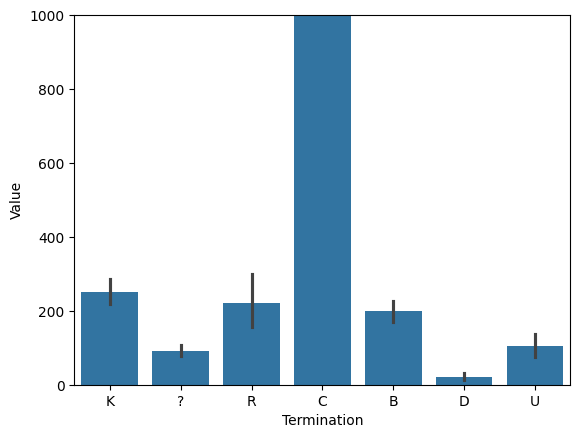

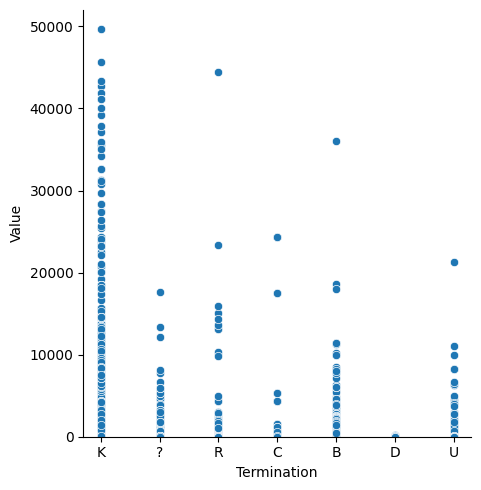

C:\Users\Sahil Jain\AppData\Local\Temp\ipykernel_49100\1938802383.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dataFiltered = zeroFilter.groupby(['Termination']).apply(ValueTermination).apply(pd.Series).reset_index()


,Termination,Mean Value,STD Value
0,?,91.048221,524.051058
1,B,198.235887,962.873242
2,C,5990.931034,8651.064864
3,D,20.775510,32.349179
4,K,249.748825,3051.654555
5,R,220.620000,1586.818029
6,U,105.770531,741.443044


In [ ]:
zeroFilter =  data[data['Value'] > 0 & data['Length'].notna()]

sns.barplot(
    data = zeroFilter,
    x = 'Termination',
    y = 'Value'
)

plt.ylim(0, 1000)
plt.show()

sns.relplot(
    data = zeroFilter,
    x = 'Termination',
    y = 'Value'
)
# Cutting off 6 outliers (all of Knotted termination)
plt.ylim(0, 52000)
plt.show()

def ValueTermination(group):
    meanLength = group.Value.mean()
    stdLength = group.Value.std()
    return (meanLength, stdLength)


dataFiltered = zeroFilter.groupby(['Termination']).apply(ValueTermination).apply(pd.Series).reset_index()
dataFiltered = dataFiltered.rename(columns = {0: 'Mean Value', 1: 'STD Value'})
display(dataFiltered)



In [7]:
print(data['Termination'].value_counts())
c_filter = data[(data['Termination'] == 'C')]
display(c_filter)

Termination
K    39665
B    10228
?     6288
U     3268
R     2345
D       72
C       38
Name: count, dtype: int64


,Unnamed: 0,khipuName,Cord_Name,Twist,Attachment,Knots,Length,Termination,Thickness,Color,Value,Alt_Value,Position,Notes
5,5,ExcelNotebooks\AK0002,1,S,R,"2S(4.5,Z),20000;4S(11.5,Z),4000;3S(19.4,Z),300...",42.0,C,0.00,MB,24365.0,0.0,NaN,NaN
7,7,ExcelNotebooks\AK0002,1,S,R,"2S(5.0,Z),20000;4S(11.5,Z),4000;3S(18.7,Z),300...",45.1,C,0.00,YB,24366.0,0.0,NaN,"Creamish color, Noticeably thicker at top"
9,9,ExcelNotebooks\AK0002,1,S,R,"1S(5.2,Z),10000;7S(10.9,Z),7000;5S(19.9,Z),500...",62.5,C,0.00,RL,17552.0,0.0,NaN,NaN
14,14,ExcelNotebooks\AK0002,1,S,R,"4S(5.5,Z),4000;3S(12.0,Z),300;2S(20.0,Z),20;9L...",64.2,C,0.00,PB,4329.0,0.0,NaN,NaN
17,17,ExcelNotebooks\AK0002,1,S,R,"5S(6.0,Z),5000;3S(13.3,Z),300;1S(19.7,S),10;5L...",65.4,C,0.00,GL,5315.0,0.0,(1:2.2),NaN
19,19,ExcelNotebooks\AK0002,1,S,R,"4S(6.4,Z),4000;3S(13.5,Z),300;3S(20.5,Z),30",70.3,C,0.00,GL,4330.0,0.0,NaN,NaN
32,32,ExcelNotebooks\AK0002,1,S,V,"1S(6.5,Z),1000;1S(12.7,Z),100",66.1,C,0.00,MB-KB,1100.0,0.0,NaN,Missing other KB ply - possible barberpole
36,36,ExcelNotebooks\AK0002,1,S,V,"7S(10.5,Z),700;5S(18.4,Z),50;5L(24.9,Z),5[AXD]",67.5,C,0.00,GL,755.0,0.0,NaN,NaN
37,37,ExcelNotebooks\AK0002,1,S,V,"1S(6.0,Z),1000;5S(11.0,Z),500;1E(24.9,S),1;1S(...",56.2,C,0.00,YB-RL,1501.0,0.0,NaN,NaN
40,40,ExcelNotebooks\AK0002,1,S,V,"1S(6.8,Z),1000;1S(11.3,Z),100;3S(18.6,Z),30;6L...",64.9,C,0.00,GL,1136.0,0.0,NaN,NaN


Untying Knots Digitally

Assumptions here:

Assume that each knot has a 2-character descriptor. Knots such as p7 on AS014 will be skipped.

Currently missing: 1L, 8L, 9L, EE, LL, BL, SP, TF

|Knot type|Length/Diameter|
| -------- | ------- |
|S|10.16|
|E|12.88|



In [ ]:
def get_number_after_p(s):
    match = re.search(r'p(\d+)', s)
    return int(match.group(1)) if match else None

def untie(row):
    knot_str = row['Knots']
    diameter= row['Thickness']
    origLen = row['Length']
    #print(row['khipuName'])
    
    try:
        curKnot = knot_str[0:2]
        scIndex = knot_str.index(';')
        row['Knots'] = (row['Knots'])[scIndex + 1:]
        print('happens fully')
    except:
        return origLen

    return (dealWithKnot(curKnot, diameter) + untie(row))



def dealWithKnot(knotVal, diameter):
    
    if(knotVal[1] == 'S'):
        return int(knotVal[0]) * diameter * 10.16
    if(knotVal[1] == 'E'):
        return diameter * 12.88
    if(knotVal == '1L'):
        return 0
        #raise Exception('No value for 1L knot')
    if(knotVal == '2L'):
        return diameter * 12.23
    if(knotVal == '3L'):
        return diameter * 21.5
    if(knotVal == '4L'):
        return diameter * 27.94
    if(knotVal == '5L'):
        return diameter * 36.35
    if(knotVal == '6L'):
        return diameter * 41.80
    if(knotVal == '7L'):
        return diameter * 53.13
    if(knotVal == '8L'):
        return 0
        #raise Exception('no value for 8L knot')
    if(knotVal == '9L'):
        return 0
        #raise Exception('No value for 9L knots')
    if(knotVal == 'EE' or knotVal =='LL' or knotVal == 'BL' or knotVal == 'SP' or knotVal == 'TF'):
        print(knotVal)
        return 0
        #raise Exception('Funny knot')
    print(knotVal)
    return 0
    #raise Exception('Something went wrong')



In [ ]:
#Using pandas to create Excel sheets

#all_fnames = glob.glob('ExcelNotebooks/*.xlsx')
all_fnames = glob.glob('pain/*.xlsx')

list_data = []

for fname in all_fnames:
    #Was having issues with hidden files, this bypasses them
    if '~' in fname:
        continue

    #truncates the file name to just discard the '.xlsx'
    khipuName = fname.split('/')[-1].split('.')[0]

    # load dataframe from this filename, and append to list_data - secondary and pendant cords
    final_df = pd.read_excel(fname, sheet_name=4, engine="openpyxl")


    # Add Khipu Name to final_df
    final_df['khipuName'] = khipuName
    final_df = final_df[['khipuName', 'Cord_Name', 'Twist', 'Attachment', 'Knots', 'Length', 'Termination', 'Thickness',
        'Color', 'Value', 'Alt_Value', 'Position', 'Notes']]
    
    final_df['family'] = final_df['Cord_Name'].apply(get_number_after_p)
    final_df['untiedLen'] = final_df.apply(untie, axis=1)


    list_data.append(final_df)

famData = pd.concat(list_data)

famData.to_excel('khipuFamilies.xlsx')
#display(famData)

happens fully
happens fully
happens fully
happens fully
happens fully
happens fully
happens fully
happens fully
happens fully
happens fully
happens fully
happens fully
happens fully
happens fully
happens fully
happens fully
happens fully
happens fully
happens fully
happens fully
happens fully
happens fully
happens fully
happens fully
happens fully
happens fully
happens fully
happens fully
happens fully
happens fully
happens fully
happens fully
happens fully
happens fully
happens fully
happens fully
happens fully
happens fully


In [ ]:
def concat_knots(series):
    return '; '.join([str(k) for k in series if pd.notnull(k)])

# Group by both khipuName and family
famVals = famData.groupby(['khipuName', 'family']).agg({
    'Knots': concat_knots,
    'Length': 'sum',
    'Value': 'sum'
    'untiedLen': 'sum'
}).reset_index()

# Final column order
famVals = famVals[['khipuName', 'Knots', 'Length', 'Value', 'family', 'untiedLen']]
display(famVals)

famVals.to_excel('FamilyGrouped.xlsx')

,family,khipuName,Knots,Length,Value
0,1,ExcelNotebooks\AK0002,"8S(12.2,Z),8000;3S(18.2,SZZ),300;9S(25.2,Z),90...",80.0,8659.0
1,2,ExcelNotebooks\AK0002,"4S(5.0,Z),4000;2S(18.3,Z),200;3S(19.9,Z),300;7...",77.7,5107.0
2,3,ExcelNotebooks\AK0002,"1S(9.7,Z),1000;3S(18.0,Z),300;3S(25.5,Z),30;9L...",63.0,1339.0
3,4,ExcelNotebooks\AK0002,"2S(4.5,Z),20000;4S(11.5,Z),4000;3S(19.4,Z),300...",42.0,24365.0
4,5,ExcelNotebooks\AK0002,"4S(11.2,Z),4000;3S(19.0,Z),300;2S(26.0,Z),20",42.0,4320.0
...,...,...,...,...,...
44089,199,ExcelNotebooks\UR298,"5S(15.0,S),50;6L(22.5,S),6[AXD]",51.0,56.0
44090,200,ExcelNotebooks\UR298,,39.5,0.0
44091,201,ExcelNotebooks\UR298,"1S(4.0,S),1000;4S(10.0,S),400;8S(15.5,S),80;6L...",42.5,1486.0
44092,202,ExcelNotebooks\UR298,,47.0,0.0


Old dud Code

In [ ]:
'''
def splitName (name):
    cords = []
    
    level = None
    number = ''
    for char in name:
        if char.isAlphabetical():
            cords.append( (char, number))
            level = char
            index = ''
        elif char.isNumeric():
            number += char



def extractNumeric(str):
    

    return 

def parse(name):
    splitName = name.split('')
    nameDict = {
        'pendant' : None,
        's1' : None,
        's2' : None,
        's3' : None,
        's4' : None,
        's5' : None
    }

    for i,cord in enumerate(cords): 
        if i == 0: 
            nameDict['pendant'] = extractNumeric(cord)
        elif i == 1:
            nameDict['s1']= extractNumeric(cord)
        elif i == 2:
            nameDict['s2']= extractNumeric(cord)
        elif i == 3:
            nameDict['s3']= extractNumeric(cord)
        elif i == 4:
            nameDict['s4']= extractNumeric(cord)
        elif i == 5:
            nameDict['s5']= extractNumeric(cord)
    
    return nameDict

listRows = [parse(name) for name in data.Cord_Name]

df = pd.DataFrame(listRows)

data = pd.concat([data, df], axis = 1)


start = s.find('p') + 1
end = s.find('s')
number = s[start:end]
'''

In [14]:
'''

def create_excel_file(filename):
    # Create a new workbook and select the active worksheet
    workbook = openpyxl.Workbook()
    sheet = workbook.active

    # Define the column names
    columns = [
        "Khipu_Name",
        "Cord_Type",
        "Twist",
        "Attachment",
        "Knots",
        "Length",
        "Termination",
        "Thickness",
        "Color",
        "Value",
        "Alt_Value",
        "Position",
        "Notes"
    ]

    # Write the column names to the first row
    for col_num, column_title in enumerate(columns, start=1):
        cell = sheet.cell(row=1, column=col_num)
        cell.value = column_title
        cell.font = Font(bold=True)  # Make the column headers bold

    # Save the workbook
    workbook.save(filename)
'''

'\n\ndef create_excel_file(filename):\n    # Create a new workbook and select the active worksheet\n    workbook = openpyxl.Workbook()\n    sheet = workbook.active\n\n    # Define the column names\n    columns = [\n        "Khipu_Name",\n        "Cord_Type",\n        "Twist",\n        "Attachment",\n        "Knots",\n        "Length",\n        "Termination",\n        "Thickness",\n        "Color",\n        "Value",\n        "Alt_Value",\n        "Position",\n        "Notes"\n    ]\n\n    # Write the column names to the first row\n    for col_num, column_title in enumerate(columns, start=1):\n        cell = sheet.cell(row=1, column=col_num)\n        cell.value = column_title\n        cell.font = Font(bold=True)  # Make the column headers bold\n\n    # Save the workbook\n    workbook.save(filename)\n'

In [15]:
'''
def copy_primary_cord(filePath, newFile, row):

    workbook = openpyxl.load_workbook(filePath)

    sheet_names = workbook.sheetnames
    khipuSheet = workbook[sheet_names[1]]
    
    primarySheet = workbook[sheet_names[2]]
    
    khipuName = (khipuSheet["A2"].value)[9:]
    cordType = 0
    twist = (primarySheet["A9"].value)[6]
    length = (primarySheet["A4"].value)[7:]
    termination = (primarySheet["A8"].value)[12:]    
    thickness = float((primarySheet["A3"].value)[10:])
    color = (primarySheet["A5"].value)[6:]  
    notes = (primarySheet["A10"].value)[6:]  


    dataBook = openpyxl.load_workbook(newFile)
    datasheet_names = dataBook.sheetnames
    dataSheet = dataBook[datasheet_names[0]]

    cord = [khipuName, cordType, twist, None, None, length, termination, thickness, color, None, None, None, notes]

    fillRow(newFile, row, cord)

    return curRow + 1

    
'''

'\ndef copy_primary_cord(filePath, newFile, row):\n\n    workbook = openpyxl.load_workbook(filePath)\n\n    sheet_names = workbook.sheetnames\n    khipuSheet = workbook[sheet_names[1]]\n\n    primarySheet = workbook[sheet_names[2]]\n\n    khipuName = (khipuSheet["A2"].value)[9:]\n    cordType = 0\n    twist = (primarySheet["A9"].value)[6]\n    length = (primarySheet["A4"].value)[7:]\n    termination = (primarySheet["A8"].value)[12:]    \n    thickness = float((primarySheet["A3"].value)[10:])\n    color = (primarySheet["A5"].value)[6:]  \n    notes = (primarySheet["A10"].value)[6:]  \n\n\n    dataBook = openpyxl.load_workbook(newFile)\n    datasheet_names = dataBook.sheetnames\n    dataSheet = dataBook[datasheet_names[0]]\n\n    cord = [khipuName, cordType, twist, None, None, length, termination, thickness, color, None, None, None, notes]\n\n    fillRow(newFile, row, cord)\n\n    return curRow + 1\n\n\n'

In [ ]:
'''
def copy_secondary_pendant_cord(filePath, newFile, startRow):
    print(f"Processing file: {filePath}")
    workbook = openpyxl.load_workbook(filePath)
    
    sheet_names = workbook.sheetnames
    if len(sheet_names) <= 4:
        raise ValueError(f"Insufficient sheets in file: {filePath}")
    
    khipuSheet = workbook[sheet_names[1]]
    khipuName = (khipuSheet["A2"].value or "")[9:]
    
    cordSheet = workbook[sheet_names[4]]
    inputRow = 2  # Assume data starts at row 2 in the cordSheet
    outputRow = startRow

   

    while True:
        cordName = cordSheet[f"A{inputRow}"].value
        if cordName is None:
            break

        cordType = sum(1 for char in cordSheet[f"A{inputRow}"].value if char.isalpha())
        twist = cordSheet[f"B{inputRow}"].value
        attachment = cordSheet[f"C{inputRow}"].value or None
        knots = cordSheet[f"D{inputRow}"].value
        length = float(cordSheet[f"E{inputRow}"].value) or None
        termination = cordSheet[f"F{inputRow}"].value
        thickness = float(cordSheet[f"G{inputRow}"].value)or None
        color = cordSheet[f"H{inputRow}"].value
        value = int(cordSheet[f"I{inputRow}"].value) or None
        altValue = int(cordSheet[f"J{inputRow}"].value)  or None
        position = cordSheet[f"K{inputRow}"].value
        notes = cordSheet[f"L{inputRow}"].value

        cord = [khipuName, cordType, twist, attachment, knots, length, termination, thickness, color, value, altValue, position, notes]
        fillRow(newFile, outputRow,cord)

        inputRow += 1
        outputRow += 1

    return outputRow  # Return the next available row        
'''

In [ ]:
'''
def fillRow(newFile, outputRow, cord):
    dataBook = openpyxl.load_workbook(newFile)
    datasheet_names = dataBook.sheetnames
    dataSheet = dataBook[datasheet_names[0]]
    
    for col_idx, value in enumerate(cord, start=1):
       dataSheet.cell(row=outputRow, column=col_idx, value=value)
   
    dataBook.save(newFile)
'''

In [ ]:
'''
# original, no multithreading
folder_path = "/Users/sahiljain/Desktop/KhipuResearch/ExcelNotebooks"
output_file = "/Users/sahiljain/Desktop/KhipuResearch/KhipuData.xlsx"
curRow = 2  # Starting row in the output file
num = 0
# Loop through the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    # Check if it's a file and ends with .xlsx
    if os.path.isfile(file_path) and file_name.endswith(".xlsx"):
        curRow = copy_primary_cord(file_path, output_file, curRow)
        curRow = copy_secondary_pendant_cord(file_path, output_file, curRow)

'''

In [ ]:
'''
statisticalData = []

for level in range((data['Cord_Name'].max()) + 1):
    filtered_data = data[(data['Cord_Name'] == level) & (data['Length'] != 0) & data['Length'].notna()]

    mean_length = filtered_data['Length'].mean()
    
    median_length = filtered_data['Length'].median()
    mode_length = filtered_data['Length'].mode()
    std_length = filtered_data['Length'].std()



    #Assumes cords w/ value of 0 irrelevant
    filtered_data = data[(data['Cord_Name'] == level) & (data['Value'] != 0) & data['Value'].notna()]
    mean_value = filtered_data['Value'].mean()
    median_value = filtered_data['Value'].median()
    mode_value = filtered_data['Value'].mode()
    std_value = filtered_data['Value'].std()

    statisticalData.append([[mean_length,median_length,mode_length,std_length],[mean_value,median_value,mode_value,std_value]])

'''